In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import pandas_profiling as pp
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import math
df=pd.read_csv("D:/Data Analysis/OTT/netflix_titles.csv")
pd.set_option('display.max_columns',None)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [140]:
df.shape

(8807, 12)

In [141]:
df.size

105684

In [142]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [143]:
print('Dataframe summarization:\n')
df.describe(include=object).T

Dataframe summarization:



,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


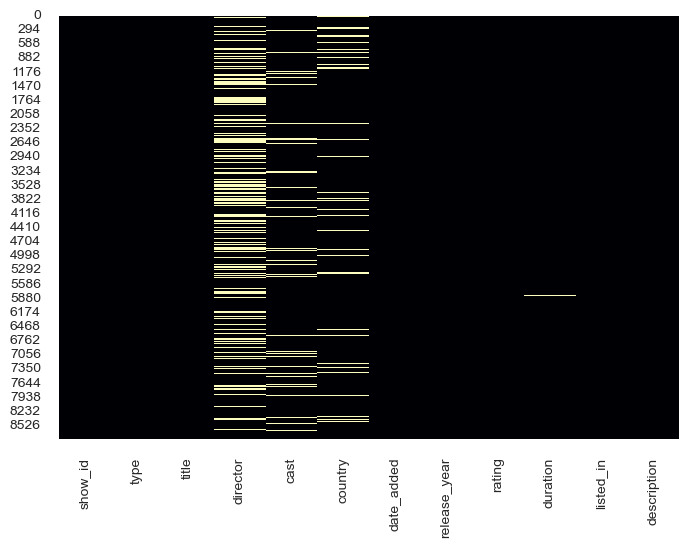

In [144]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [145]:
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        print('Total Number of missing values in ' + df.isnull().sum().index[i] + ' : ',df.isnull().sum()[i])

Total Number of missing values in director :  2634
Total Number of missing values in cast :  825
Total Number of missing values in country :  831
Total Number of missing values in date_added :  10
Total Number of missing values in rating :  4
Total Number of missing values in duration :  3


In [146]:
# Switching columns of rating and durations
index = list(df[df.isnull()['duration'] == True].index)
df.loc[index, 'duration'] = df.loc[index, 'rating']
df.loc[index,'rating'] = np.nan
df.loc[index,:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [147]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [148]:
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        print('Total Number of missing values in ' + df.isnull().sum().index[i] + ' : ',df.isnull().sum()[i])

Total Number of missing values in director :  2634
Total Number of missing values in cast :  825
Total Number of missing values in country :  831
Total Number of missing values in date_added :  10
Total Number of missing values in rating :  7


In [149]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [150]:
print('Number of Unique Values in rating : ', len(df['rating'].unique()))

Number of Unique Values in rating :  15


In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(stop_words= 'english')
index = list(df[df.isnull()['rating'] == True].index)

df1 = df[['rating','description']].copy(deep = True)
df1.drop(index = index,inplace = True)
df1.head()

,rating,description
0,PG-13,"As her father nears the end of his life, filmm..."
1,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,TV-MA,To protect his family from a powerful drug lor...
3,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,TV-MA,In a city of coaching centers known to train I...


In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print('Label Encoder Transformation')
df1['rating'] = le.fit_transform(df1['rating'])
print('rating : ',df1['rating'].unique(),' = ',le.inverse_transform(df1['rating'].unique()))

Label Encoder Transformation
rating :  [ 4  8  3  6  9 10 11  5  7  0  1  2 12 13]  =  ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [153]:
from sklearn.model_selection import train_test_split
x_train = tfidf.fit_transform(df1['description']).toarray()
x_test = tfidf.transform(df.loc[index,'description']).toarray()
y_train = df1['rating'].values
y_train

array([4, 8, 8, ..., 5, 3, 6])

In [154]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train,y_train)
print('Predicted Value : ',clf.predict(x_test),' = ',le.inverse_transform(clf.predict(x_test)))

Predicted Value :  [8 8 8 8 8 8 8]  =  ['TV-MA' 'TV-MA' 'TV-MA' 'TV-MA' 'TV-MA' 'TV-MA' 'TV-MA']


In [155]:
df['rating'].fillna('TV-MA',inplace = True)
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        print('Total Number of missing values in ' + df.isnull().sum().index[i] + ' : ',df.isnull().sum()[i])

Total Number of missing values in director :  2634
Total Number of missing values in cast :  825
Total Number of missing values in country :  831
Total Number of missing values in date_added :  10


In [156]:
df[df.isnull()['date_added'] == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [157]:
index = list(df[df.isnull()['date_added'] == True].index)
df.loc[index,'date_added'] = ['January 1, ' + str(i) for i in df.loc[index,'release_year']]

In [158]:
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        print('Total Number of missing values in ' + df.isnull().sum().index[i] + ' : ',df.isnull().sum()[i])

Total Number of missing values in director :  2634
Total Number of missing values in cast :  825
Total Number of missing values in country :  831


In [159]:
df['country'].fillna('No Info',inplace = True)
df['cast'].fillna('No Info',inplace = True)
df['director'].fillna('No Info',inplace = True)
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        print('Total Number of missing values in ' + df.isnull().sum().index[i] + ' : ',df.isnull().sum()[i])

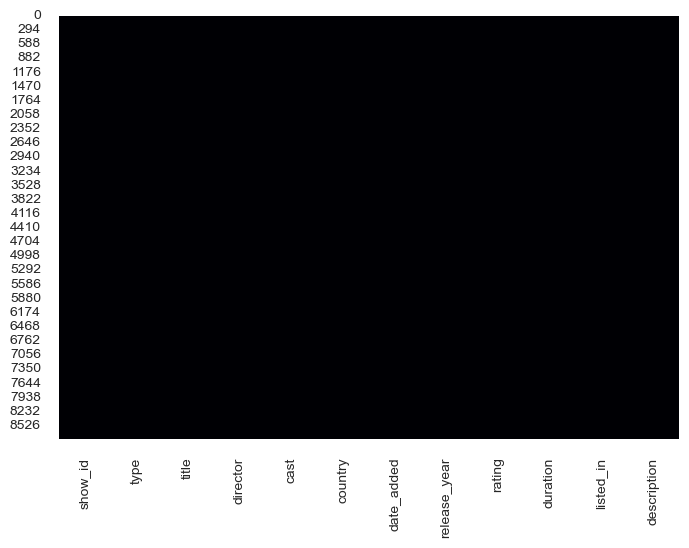

In [160]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [161]:
type_count=df['type'].value_counts()
type_count

Movie      6131
TV Show    2676
Name: type, dtype: int64

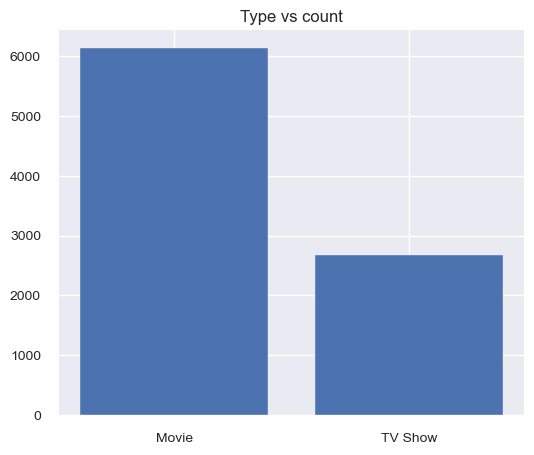

In [162]:
plt.figure(figsize=(6,5))
plt.bar(type_count.index,type_count.values)
plt.title('Type vs count')
plt.show()

In [163]:
director_name=pd.DataFrame()
director_name=df['director'].str.split(',',expand=True).stack()
director_name=director_name.to_frame()
director_name.columns=['Director']
directors=director_name.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='Not specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

In [164]:
cast_name=pd.DataFrame()
cast_name=df['cast'].str.split(',',expand=True).stack()
cast_name=cast_name.to_frame()
cast_name.columns=['Actor']
actors=cast_name.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='Not specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Top 5 Actors on Netflix')
fig2.show()

In [165]:
last=df.loc[(df['release_year']>2005)]
last.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Info,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Info,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Info,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Info,No Info,No Info,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Info,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [166]:
p=df.groupby(['rating']).size().reset_index(name='counts')
piechart=px.pie(p,values='counts',names='rating',title='Ratings of different contents on netflix')
piechart.show()

In [167]:
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]
top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
print(top20)

                                      title no_of_seasons
1329  The Misadventures of Hedi and Cokeman        99 min
6278                               Being AP        99 min
952                    The Whole Nine Yards        99 min
6141                       American Hangman        99 min
929                 Dead Again in Tombstone        99 min
5146                             The Worthy        99 min
910                                 Monster        99 min
2780                                 Curtiz        99 min
894                  Dance of the Forty One        99 min
7424                            May We Chat        99 min
7402                                   Mara        99 min
6203                              B.A. Pass        99 min
5074                    Bad Day for the Cut        99 min
877                            Cinema Bandi        99 min
7369                              Mad Money        99 min
8685                                    VS.        99 min
858           

In [168]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

In [169]:
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
dfx

,Release Year,description
0,2020,"As her father nears the end of his life, filmm..."
1,2021,"After crossing paths at a party, a Cape Town t..."
2,2021,To protect his family from a powerful drug lor...
3,2021,"Feuds, flirtations and toilet talk go down amo..."
4,2021,In a city of coaching centers known to train I...
...,...,...
8802,2007,"A political cartoonist, a crime reporter and a..."
8803,2018,"While living alone in a spooky town, a young g..."
8804,2009,Looking to survive in a world taken over by zo...
8805,2006,"Dragged from civilian life, a former superhero..."


In [170]:
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent

dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')
dfx=dfx[dfx['Release Year']>=2010]
dfx

,Release Year,Sentiment,Total Content
149,2010,Negative,53
150,2010,Neutral,40
151,2010,Positive,101
152,2011,Negative,46
153,2011,Neutral,33
154,2011,Positive,106
155,2012,Negative,73
156,2012,Neutral,39
157,2012,Positive,125
158,2013,Negative,93


In [171]:
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

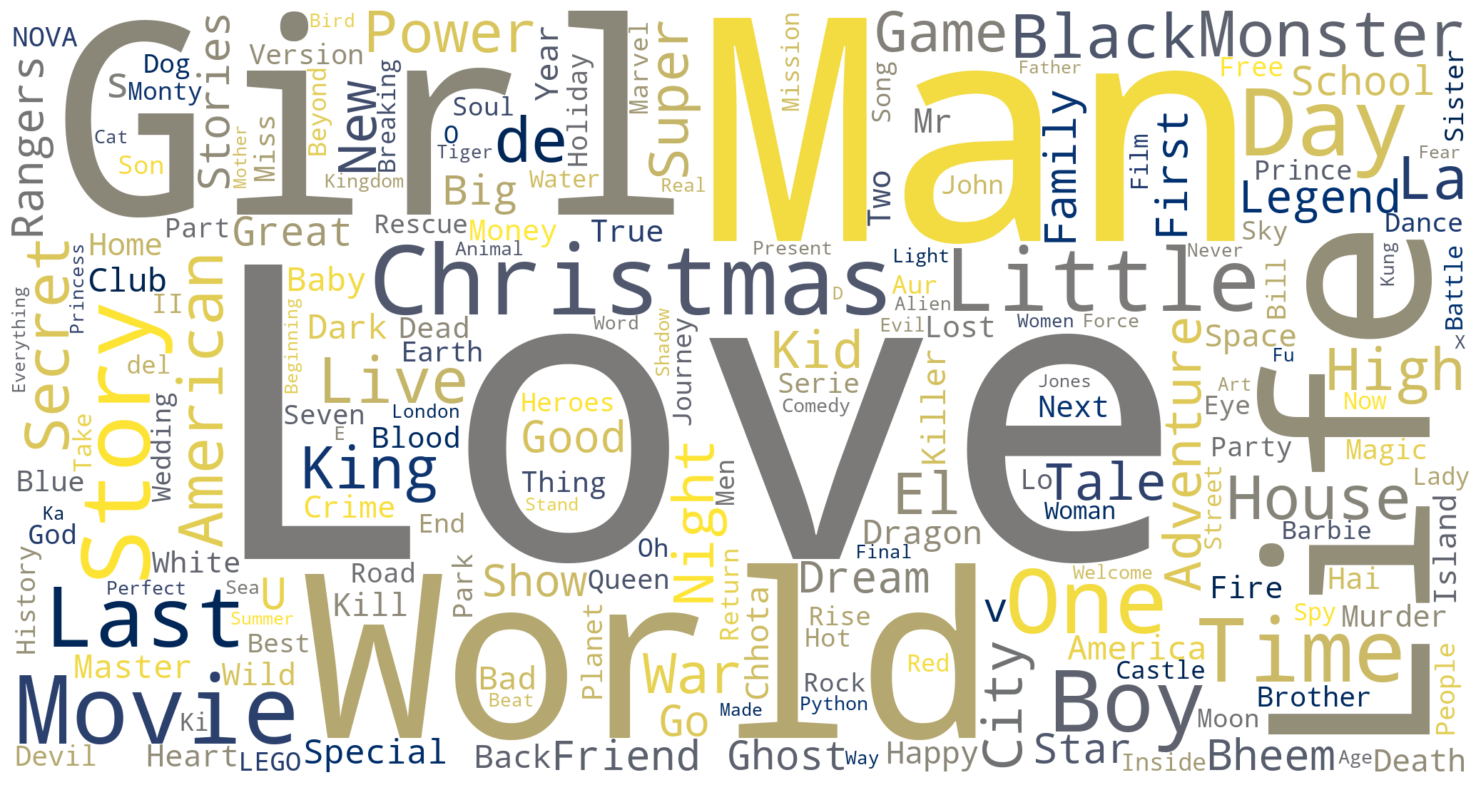

In [172]:
txt1 = " ".join(title for title in df.title)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',width = 2048, height = 1080,colormap='cividis').generate(txt1)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [174]:
Profile_report = pp.ProfileReport(df,title='Netflix data')
Profile_report.to_notebook_iframe()